<a href="https://colab.research.google.com/github/angui100/AI-TensorFlow-Study-Group/blob/master/AI_Group_Study_AutoEncoders_MNIST_Digits_Noise_Removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STEP #0: PROBLEM STATEMENT  


- Auto encoders are a type of Artificial Neural Networks that are used to perform a task of data encoding (representation learning). 
- Auto encoders use the same input data for the input and output, Sounds crazy right!?
- Auto encoders work by adding a bottleneck in the network.
- This bottleneck forces the network to create a compressed (encoded) version of the original input
- Auto encoders work well if correlations exists between input data (performs poorly if the all input data is independent) 






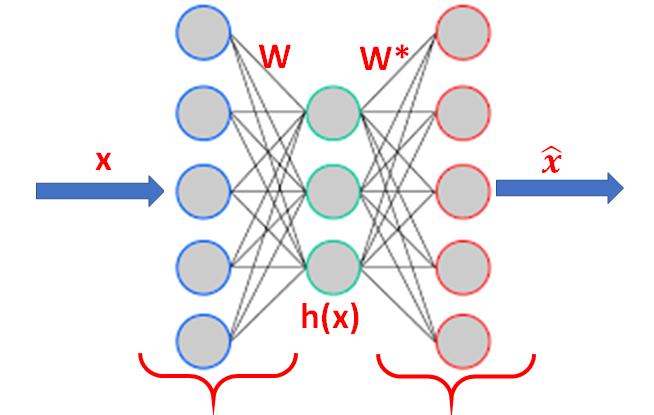

# STEP #1: IMPORT LIBRARIES

In [0]:
!pip install tensorflow-gpu==2.0.0.alpha0

In [0]:
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 

In [3]:
tf.__version__

'2.0.0-alpha0'

# STEP #2: LOAD DATASET

In [4]:
from tensorflow.keras.datasets import mnist

(X_train, y_train),(X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


# STEP #3: DATA VISUALIZATION

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

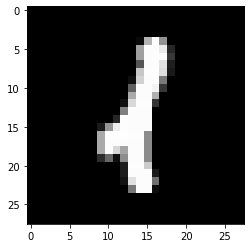

In [7]:
# Let's view some images!
i = random.randint(1,60000) # select any random index from 1 to 60,000

plt.imshow( X_train[i] , cmap = 'gray') # reshape and plot the image



In [8]:
label = y_train[i]
label


1

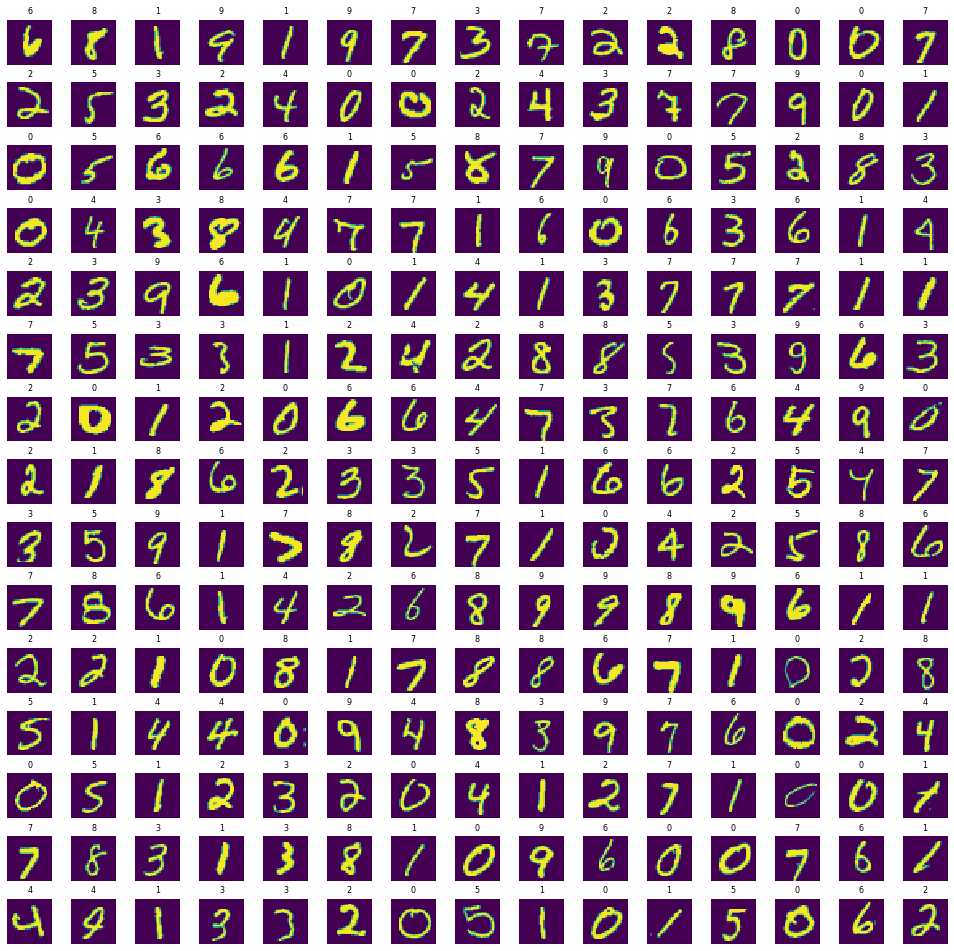

In [9]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( X_train[index] )
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)


# STEP #4: LET'S ADD SOME NOISE TO OUR DATASET!

In [0]:
# Let's normalize the data
X_train = X_train / 255
X_test = X_test / 255

In [0]:
# Let's create some noise with the same dimensions as the original image (28,28)
added_noise = np.random.randn(*(28,28))

In [12]:
added_noise.shape

(28, 28)

In [0]:
noise_factor = 0.3
added_noise = noise_factor * np.random.randn(*(28,28))

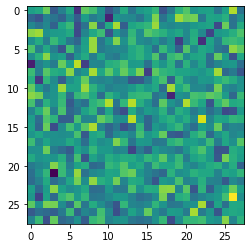

In [14]:
plt.imshow(added_noise)

In [0]:
# Let's take a sample image and add noise to it
noise_factor = 0.2
sample_image = X_train[101]
noisy_sample_image = sample_image + noise_factor * np.random.randn(*(28,28))

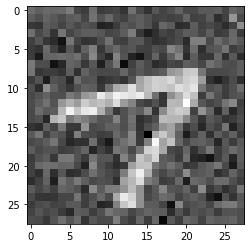

In [16]:
plt.imshow(noisy_sample_image, cmap="gray")

In [17]:
noisy_sample_image.max()

1.359369037512623

In [18]:
noisy_sample_image.min()

-0.6287811512944708

In [0]:
# Let's clip the image to range from 0 to 1
noisy_sample_image = np.clip(noisy_sample_image, 0., 1.)

In [20]:
noisy_sample_image.max()

1.0

In [21]:
noisy_sample_image.min()

0.0

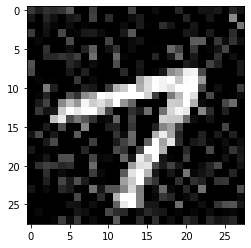

In [22]:
plt.imshow(noisy_sample_image, cmap="gray")

In [0]:
# Let's do the same operation over all the images contained in the training dataset
X_train_noisy = []
noise_factor = 0.2

for sample_image in X_train:
  sample_image_noisy = sample_image + noise_factor * np.random.randn(*(28,28))
  sample_image_noisy = np.clip(sample_image_noisy, 0., 1.)
  X_train_noisy.append(sample_image_noisy)

In [0]:
X_train_noisy # this is a list, let's convert it to array

In [0]:
 # Convert from list to array
X_train_noisy = np.array(X_train_noisy)

In [26]:
X_train_noisy.shape

(60000, 28, 28)

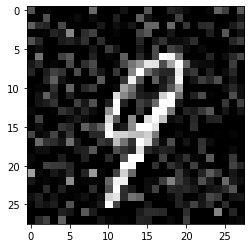

In [27]:
plt.imshow(X_train_noisy[22], cmap="gray")

In [0]:
# Let's do the same operation for the testing dataset as well
X_test_noisy = []
noise_factor = 0.4

for sample_image in X_test:
  sample_image_noisy = sample_image + noise_factor * np.random.randn(*(28,28))
  sample_image_noisy = np.clip(sample_image_noisy, 0., 1.)
  X_test_noisy.append(sample_image_noisy)

# Convert from list to array
X_test_noisy = np.array(X_test_noisy)

In [29]:
X_test_noisy.shape

(10000, 28, 28)

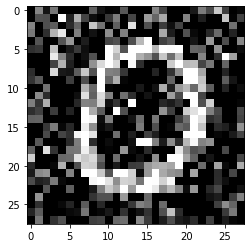

In [30]:
# Let's make sure that the test images are noisy as well!
plt.imshow(X_test_noisy[10], cmap = 'gray')

# STEP #5: BUILD AND TRAIN OUR AUTOENCODER DEEP LEARNING MODEL

In [0]:
autoencoder = tf.keras.models.Sequential()

# Let's build the encoder CNN
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same", input_shape=(28, 28, 1)))
autoencoder.add(tf.keras.layers.MaxPooling2D((2,2), padding="same"))

autoencoder.add(tf.keras.layers.Conv2D(8, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.MaxPooling2D((2,2), padding="same"))

# Encoded image (code layer)
autoencoder.add(tf.keras.layers.Conv2D(8, (3,3), strides=1, padding="same"))

# Let's build the decoder CNN 
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))
autoencoder.add(tf.keras.layers.Conv2DTranspose(8,(3,3), strides=1, padding="same"))

autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))
# autoencoder.add(tf.keras.layers.Conv2DTranspose(1, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.Conv2DTranspose(1, (3,3), strides=1, activation='sigmoid', padding="same"))


In [32]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 8)         5

In [33]:

autoencoder.fit(X_train_noisy.reshape(-1, 28, 28, 1),          
          X_train.reshape(-1, 28, 28, 1), 
          epochs=10, 
          batch_size=200)


Epoch 1/10
60000/60000 [==============================] - 9s 147us/sample - loss: 0.2170
Epoch 2/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1052
Epoch 3/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0961
Epoch 4/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0926
Epoch 5/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0905
Epoch 6/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0891
Epoch 7/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0881
Epoch 8/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0874
Epoch 9/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0868
Epoch 10/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0863


# STEP #5: EVALUATE THE MODEL

In [0]:
# Let's pick up 15 images and run them through the trained autoencoder
denoised_images = autoencoder.predict(X_test_noisy[:15].reshape(-1, 28, 28, 1))

In [35]:
denoised_images.shape

(15, 28, 28, 1)

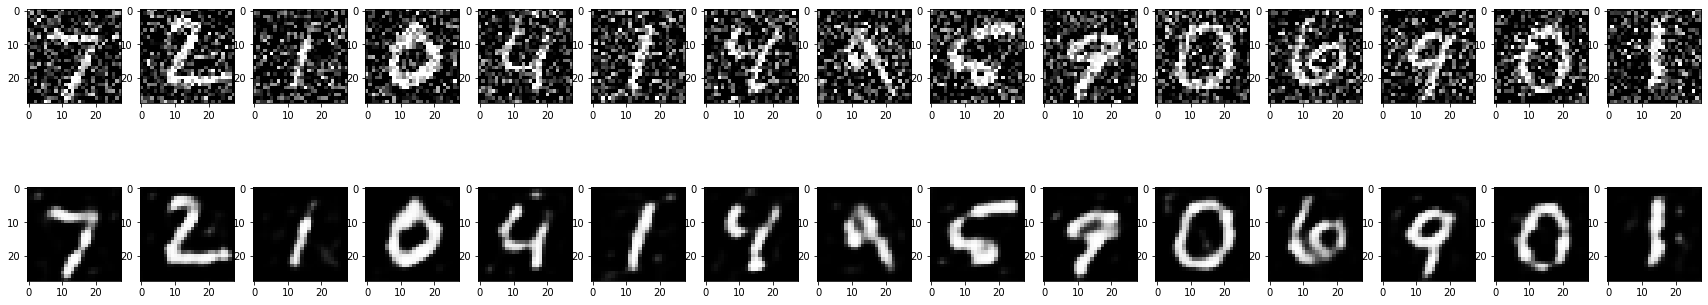

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=15, figsize=(30,6))
for images, row in zip([X_test_noisy[:15], denoised_images], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='gray')
    